# Experiment

We run the instances from `flowersnark{2..119}` with the `nosym` parameter.
Set a time limit of 240 seconds, to get a grasp of which instances are slow and which are not.

After that, run `grep "Solving Time" *flowersnark*.cip.out`
and write that to `flowersnark_test_output.txt`.
Then compare the parameters `n`, `c` ($c=3$, always) and time `t`.

Conclusion: Without symmetry handling, even values of $n$ are trivially solvable,
while odd values run into the time limit as low as $n=13$

Note: $n=13$ corresponds to `flosn52` of Margot! (multiplication factor of 4),
and `flosn60` and `flosn84` to $n=15$ and $n=21$, respectively.


In [17]:
import re

with open("flowersnark_test_output.txt", "r") as f:
    lines = f.read()


In [18]:
patt = re.compile(
    r"^(\w+)flowersnark(\d+)_(\d+).cip.out:Solving Time \(sec\) : (\d+\.?\d+)$",
    re.MULTILINE
)

data = []
for mat in patt.finditer(lines):
    v, n, c, t = mat.group(1), int(mat.group(2)), int(mat.group(3)), float(mat.group(4))
    data.append((v, n, c, t))



In [19]:
variants = sorted(set(ent[0] for ent in data))

Text(0, 0.5, 'time (s)')

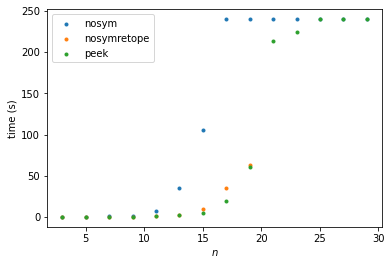

In [23]:
import matplotlib.pyplot as plt

nvalues = set()
for v, n, c, t in data:
    if n < 30:
        nvalues.add(n)
    # if n % 2 == 0:
    #     continue
    # if t < 200:
    #     nvalues.add(n)

for v in variants:
    plt.scatter(
        [n for v_, n, c, t in data if v_ == v and n in nvalues], 
        [t for v_, n, c, t in data if v_ == v and n in nvalues], 
        marker="."
    )
plt.legend(variants)
plt.xlabel("$n$")
plt.ylabel("time (s)")

In [21]:
data

[('nosym', 11, 3, 6.62),
 ('nosym', 13, 3, 34.53),
 ('nosym', 15, 3, 105.2),
 ('nosym', 17, 3, 240.0),
 ('nosym', 19, 3, 240.0),
 ('nosym', 21, 3, 240.0),
 ('nosym', 23, 3, 240.0),
 ('nosym', 25, 3, 240.0),
 ('nosym', 27, 3, 240.0),
 ('nosym', 29, 3, 240.0),
 ('nosym', 31, 3, 240.0),
 ('nosym', 33, 3, 240.0),
 ('nosym', 3, 3, 0.02),
 ('nosym', 35, 3, 240.0),
 ('nosym', 37, 3, 240.0),
 ('nosym', 39, 3, 240.0),
 ('nosym', 41, 3, 120.72),
 ('nosym', 43, 3, 120.67),
 ('nosym', 45, 3, 120.68),
 ('nosym', 47, 3, 120.67),
 ('nosym', 49, 3, 120.66),
 ('nosym', 51, 3, 120.63),
 ('nosym', 53, 3, 120.58),
 ('nosym', 5, 3, 0.04),
 ('nosym', 55, 3, 119.98),
 ('nosym', 57, 3, 119.48),
 ('nosym', 59, 3, 114.04),
 ('nosym', 61, 3, 86.12),
 ('nosym', 63, 3, 15.44),
 ('nosym', 7, 3, 0.68),
 ('nosym', 9, 3, 1.15),
 ('nosymretope', 11, 3, 1.01),
 ('nosymretope', 13, 3, 2.87),
 ('nosymretope', 15, 3, 9.61),
 ('nosymretope', 17, 3, 35.55),
 ('nosymretope', 19, 3, 62.88),
 ('nosymretope', 3, 3, 0.0),
 ('nosy